In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.power import ttest_power
import scipy.stats as stats
from scipy.stats import ttest_1samp,ttest_ind

In [2]:
df=pd.read_csv("C:/Users/DELL/OneDrive/Documents/GL-DSBA/SMDM-Proj2/Wholesale Customers Data.csv")

### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [3]:
df.describe(include="all")

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [5]:
df['Total']=df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [6]:
df.isnull()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False,False,False


In [7]:
t=df.groupby('Channel')['Total'].sum().sort_values(ascending=False)
t

Channel
Hotel     7999569
Retail    6619931
Name: Total, dtype: int64

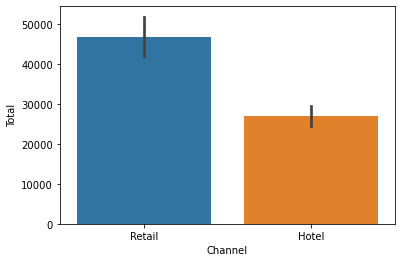

In [8]:
sns.barplot(x='Channel',y='Total',data=df)
plt.show()

In [9]:
t=df.groupby('Region')['Total'].sum().sort_values(ascending=False)
t

Region
Other     10677599
Lisbon     2386813
Oporto     1555088
Name: Total, dtype: int64

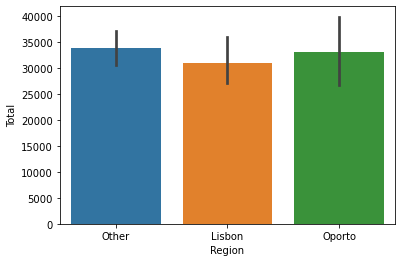

In [10]:
sns.barplot(x='Region',y='Total',data=df)
plt.show()

#### 1.2. There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

<AxesSubplot:xlabel='Region', ylabel='Fresh'>

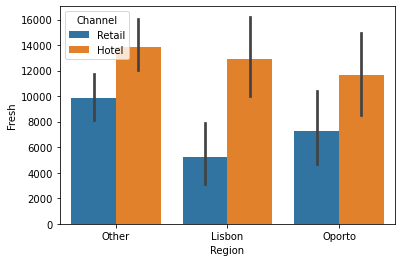

In [11]:
sns.barplot(x="Region",y="Fresh",hue="Channel",data=df)

#### Comments:From the bar plot,The annual spend on Fresh is higher in Other region under Hotel channel and lesser in Lisbon region under Retail channel.

<AxesSubplot:xlabel='Region', ylabel='Milk'>

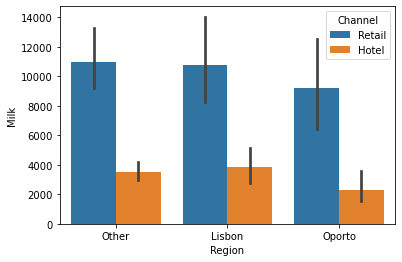

In [12]:
sns.barplot(x="Region",y="Milk",hue="Channel",data=df)

#### Comments:From the bar plot,The annual spend on Milk is higher in Lisbon region under Retail channel and lesser in Oporto region under Hotel channel.

<AxesSubplot:xlabel='Region', ylabel='Grocery'>

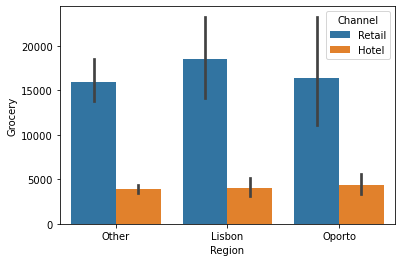

In [13]:
sns.barplot(x="Region",y="Grocery",hue="Channel",data=df)

#### Comments:From the bar plot,The annual spend on Grocery is higher in Lisbon region under Retail channel and lesser in Other region under Hotel channel.

<AxesSubplot:xlabel='Region', ylabel='Frozen'>

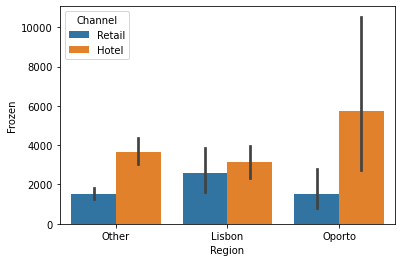

In [14]:
sns.barplot(x="Region",y="Frozen",hue="Channel",data=df)

#### Comments:From the bar plot,The annual spend on Frozen is higher in Oporto region under Hotel channel and lesser in Other region under Retail channel.

<AxesSubplot:xlabel='Region', ylabel='Detergents_Paper'>

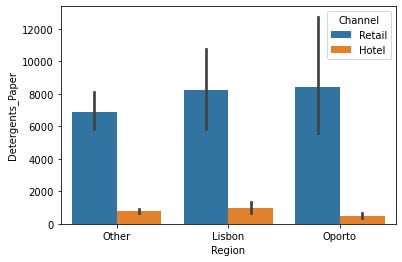

In [15]:
sns.barplot(x="Region",y="Detergents_Paper",hue="Channel",data=df)

#### Comments:From the bar plot,The annual spend on Detergents_Paper is higher in Oporto region under Retail channel and lesser under Retail channel.

<AxesSubplot:xlabel='Region', ylabel='Delicatessen'>

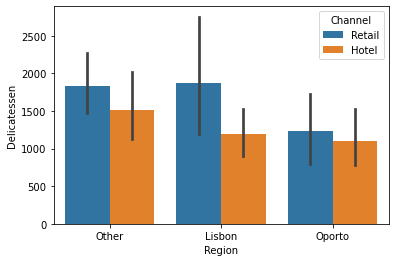

In [16]:
sns.barplot(x="Region",y="Delicatessen",hue="Channel",data=df)

#### Comments:From the bar plot,The annual spend on Delicatessen is higher in Lisbon region under Retail channel and lesser in Oporto region under Hotel channel.

#### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [17]:
df.std()



C:\Users\DELL\AppData\Local\Temp/ipykernel_5248/1433745906.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Buyer/Spender         127.161315
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
Total               26356.301730
dtype: float64

In [18]:
df.mean()

C:\Users\DELL\AppData\Local\Temp/ipykernel_5248/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Buyer/Spender         220.500000
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
Total               33226.136364
dtype: float64

In [19]:
CV=df.std()/df.mean()
CV

C:\Users\DELL\AppData\Local\Temp/ipykernel_5248/2963458702.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  CV=df.std()/df.mean()


Buyer/Spender       0.576695
Fresh               1.053918
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
Total               0.793240
dtype: float64

####  Delicatessen shows most inconsistent behavior among the other items.
####  Fresh shows least inconsistent behavior among the other items.



#### 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

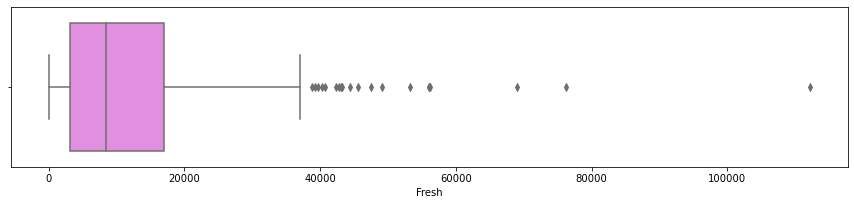

<AxesSubplot:xlabel='Delicatessen'>

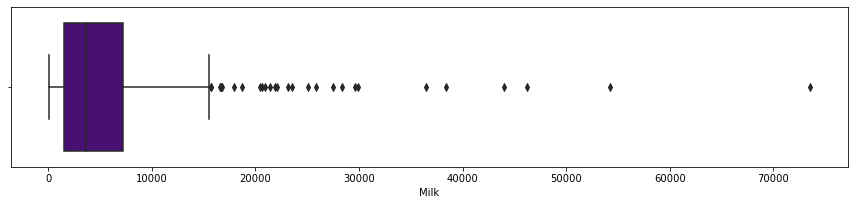

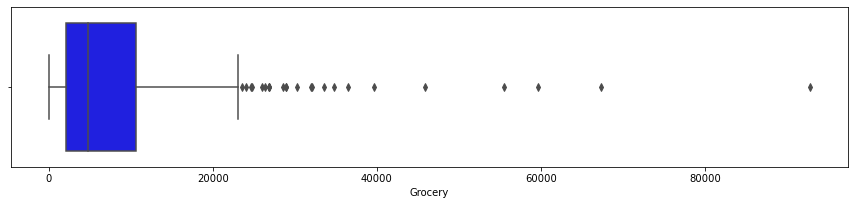

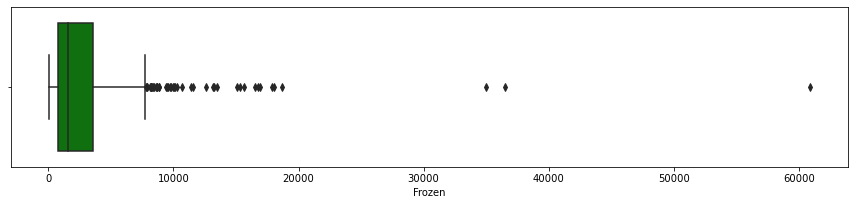

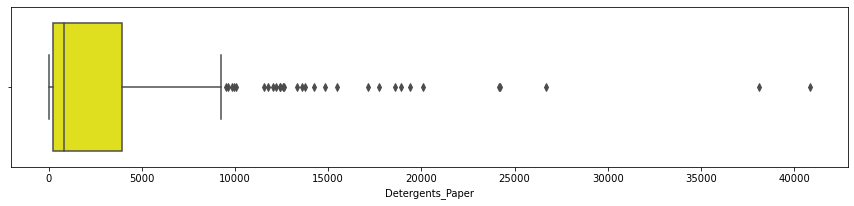

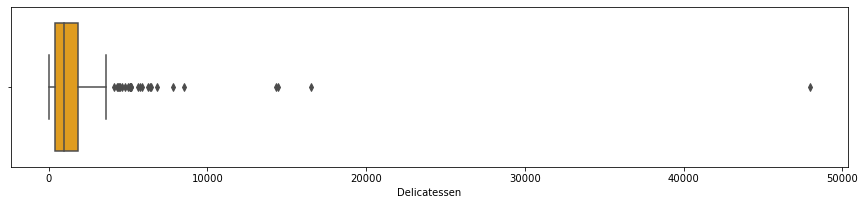

In [20]:
plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x= df.Fresh, color='Violet')
plt.show()

plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x= df.Milk, color='Indigo')

plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x= df.Grocery, color='Blue')

plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x= df.Frozen, color='Green')

plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x= df.Detergents_Paper, color='yellow')

plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x= df.Delicatessen, color='orange')

#### 2 The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates.

In [21]:
df=pd.read_csv("C:/Users/DELL/OneDrive/Documents/GL-DSBA/SMDM-Proj2/Survey.csv")

In [22]:
df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [23]:
pd.crosstab(df['Gender'], df['Major'], margins = True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [24]:
pd.crosstab(df['Gender'], df['Grad Intention'], margins = True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [25]:
pd.crosstab(df['Gender'], df['Employment'], margins = True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [26]:
pd.crosstab(df['Gender'], df['Computer'],margins=True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [27]:
df

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


#### 2.2.1: What is the probability that a randomly selected CMSU student will be male?

In [29]:
Total=df['Gender'].value_counts().sum()
Total

62

In [30]:
Male=df['Gender'].value_counts().iloc[1]
Male

29

In [31]:
Female=df['Gender'].value_counts().iloc[0]
Female

33

#### The probability of randomly selected CMSU student being male is 29/62

#### 2.2.2: What is the probability that a randomly selected CMSU student will be female?

#### The probability of randomly selected CMSU student being female is 33/62

#### 2.3.1 Find the conditional probability of different majors among the male students in CMSU.

In [32]:
df[df['Gender']=='Male']['Major'].value_counts()

Management                6
Retailing/Marketing       5
Other                     4
Economics/Finance         4
Accounting                4
Undecided                 3
International Business    2
CIS                       1
Name: Major, dtype: int64

In [33]:
df[df['Gender']=='Male']['Major'].value_counts().iloc[0:8]/Male


Management                0.206897
Retailing/Marketing       0.172414
Other                     0.137931
Economics/Finance         0.137931
Accounting                0.137931
Undecided                 0.103448
International Business    0.068966
CIS                       0.034483
Name: Major, dtype: float64

#### 2.3.2 Find the conditional probability of different majors among the female students in CMSU.

In [34]:
df[df['Gender']=='Female']['Major'].value_counts()

Retailing/Marketing       9
Economics/Finance         7
Management                4
International Business    4
Other                     3
CIS                       3
Accounting                3
Name: Major, dtype: int64

In [35]:
df[df['Gender']=='Female']['Major'].value_counts().iloc[0:7]/Female

Retailing/Marketing       0.272727
Economics/Finance         0.212121
Management                0.121212
International Business    0.121212
Other                     0.090909
CIS                       0.090909
Accounting                0.090909
Name: Major, dtype: float64

#### 2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.

In [36]:
df[df['Gender']=='Male']['Grad Intention'].value_counts()

Yes          17
Undecided     9
No            3
Name: Grad Intention, dtype: int64

In [37]:
df[df['Gender']=='Male']['Grad Intention'].value_counts().iloc[0]/Total

0.27419354838709675

#### 2.4.2 Find the probability That a randomly chosen student is a female who does not have laptop.

In [38]:
df[df['Gender']=='Female']['Computer'].value_counts()

Laptop     29
Tablet      2
Desktop     2
Name: Computer, dtype: int64

In [39]:
df[df['Gender']=='Female']['Computer'].value_counts().iloc[1:3]/Total

Tablet     0.032258
Desktop    0.032258
Name: Computer, dtype: float64

In [40]:
0.032258+0.032258

0.064516

#### 2.5.1 Find the probability that a randomly chosen student is a male or has a full-time employment.

In [41]:
df[df['Gender']=='Male']['Employment'].value_counts()

Part-Time     19
Full-Time      7
Unemployed     3
Name: Employment, dtype: int64

In [42]:
df[df['Gender']=='Male']['Employment'].value_counts().iloc[1]/Male

0.2413793103448276

#### 2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management

In [43]:
df[df['Gender']=='Female']['Major'].value_counts()

Retailing/Marketing       9
Economics/Finance         7
Management                4
International Business    4
Other                     3
CIS                       3
Accounting                3
Name: Major, dtype: int64

In [44]:
df[df['Gender']=='Female']['Major'].value_counts().iloc[2:4]/33

Management                0.121212
International Business    0.121212
Name: Major, dtype: float64

In [45]:
0.1212+0.1212

0.2424

#### 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [46]:
pd.crosstab(df['Gender'], df['Grad Intention']).drop(columns='Undecided')

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


#### P (Grad .Intention) = 28/40 = 0.7 (Students who opted yes)
#### P (Grad ∩ Female) = 11/20 = 0.55 (Female students who opted yes)



### 2.7.1: If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [47]:
pd.crosstab(df['Gender'],df['GPA'],margins=True)

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,All
Gender,,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1,33
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0,29
All,1,1,6,2,3,4,7,7,6,5,7,6,3,2,1,1,62


In [48]:
df[df['GPA']<3.0]['Gender'].value_counts().iloc[0:2]/62

Male      0.145161
Female    0.129032
Name: Gender, dtype: float64

In [49]:
0.145161+0.129032

0.274193

#### 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [50]:
pd.crosstab(df['Gender'],df['Salary'],margins=True)

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,All
Gender,,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1,33
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1,29
All,1,5,2,1,1,12,1,5,1,1,9,1,1,8,8,1,1,1,2,62


In [51]:
df[df['Salary']>=50.0]['Gender'].value_counts()

Female    18
Male      14
Name: Gender, dtype: int64

In [52]:
df[df['Salary']>=50.0]['Gender'].value_counts().iloc[0]/Female

0.5454545454545454

In [53]:
df[df['Salary']>=50.0]['Gender'].value_counts().iloc[1]/Male

0.4827586206896552

#### 2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

In [54]:

df[['GPA','Salary','Spending','Text Messages']]


,GPA,Salary,Spending,Text Messages
0,2.9,50.0,350,200
1,3.6,25.0,360,50
2,2.5,45.0,600,200
3,2.5,40.0,600,250
4,2.8,40.0,500,100
...,...,...,...,...
57,2.4,40.0,1000,10
58,2.9,40.0,350,250
59,2.5,55.0,500,500
60,3.5,30.0,490,50


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


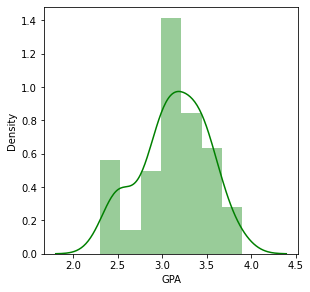

In [55]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['GPA'],color='Green')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


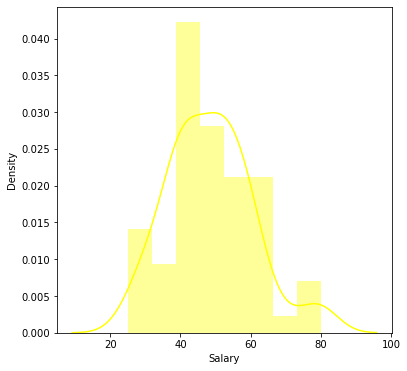

In [56]:
plt.figure(figsize=(6,6))
sns.distplot(df['Salary'],color='Yellow')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


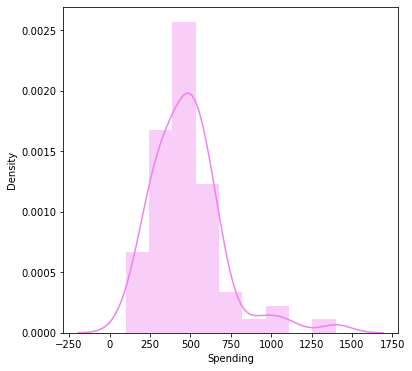

In [57]:
plt.figure(figsize=(6,6))
sns.distplot(df['Spending'],color='Violet')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


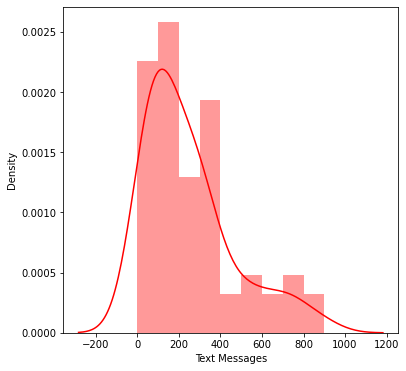

In [58]:
plt.figure(figsize=(6,6))
sns.distplot(df['Text Messages'],color='Red')
plt.show()

In [59]:
df.mean()

C:\Users\DELL\AppData\Local\Temp/ipykernel_5248/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


ID                    31.500000
Age                   21.129032
GPA                    3.129032
Salary                48.548387
Social Networking      1.516129
Satisfaction           3.741935
Spending             482.016129
Text Messages        246.209677
dtype: float64

In [60]:
df.median()

C:\Users\DELL\AppData\Local\Temp/ipykernel_5248/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


ID                    31.50
Age                   21.00
GPA                    3.15
Salary                50.00
Social Networking      1.00
Satisfaction           4.00
Spending             500.00
Text Messages        200.00
dtype: float64

In [61]:
df.std()

C:\Users\DELL\AppData\Local\Temp/ipykernel_5248/3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


ID                    18.041619
Age                    1.431311
GPA                    0.377388
Salary                12.080912
Social Networking      0.844305
Satisfaction           1.213793
Spending             221.953805
Text Messages        214.465950
dtype: float64

#### 3.1: Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [62]:
df=pd.read_csv("C:/Users/DELL/OneDrive/Documents/GL-DSBA/SMDM-Proj2/AB shingles.csv")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [64]:
df.A

0     0.44
1     0.61
2     0.47
3     0.30
4     0.15
5     0.24
6     0.16
7     0.20
8     0.20
9     0.20
10    0.26
11    0.14
12    0.33
13    0.13
14    0.72
15    0.51
16    0.28
17    0.39
18    0.39
19    0.25
20    0.16
21    0.20
22    0.22
23    0.42
24    0.24
25    0.21
26    0.49
27    0.34
28    0.36
29    0.29
30    0.27
31    0.40
32    0.29
33    0.43
34    0.34
35    0.37
Name: A, dtype: float64

In [85]:
Shingles_B=df.B.dropna()
Shingles_B

0     0.14
1     0.15
2     0.31
3     0.16
4     0.37
5     0.18
6     0.42
7     0.58
8     0.25
9     0.41
10    0.17
11    0.13
12    0.23
13    0.11
14    0.10
15    0.19
16    0.22
17    0.44
18    0.11
19    0.11
20    0.31
21    0.43
22    0.26
23    0.18
24    0.44
25    0.43
26    0.16
27    0.52
28    0.36
29    0.22
30    0.39
Name: B, dtype: float64

In [67]:
tstat,p_value=ttest_1samp(df['A'],0.35)
p_value/2

0.07477633144907513

In [68]:
tstat

-1.4735046253382782

In [87]:
tstat,pval=ttest_1samp(Shingles_B, 0.35)
pval/2

0.0020904774003191813

In [91]:
tstat

-3.1003313069986995

In [93]:
tstat,p_value=ttest_ind(df['A'],Shingles_B)
p_value

0.2017496571835328

In [94]:
tstat

1.289628271966112